## 영상처리

In [28]:
!dir/w

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: CE6B-3D38

 c:\Users\user\Pictures\public ���͸�

[.]                  [..]                 .gitignore
[.ipynb_checkpoints] [ciw]                [etc]
frame_choice.jpg     frame_choice2.jpg    git���ɾ�.txt
old_scada.mp4        py03.ipynb           py04.ipynb
py05.ipynb           py06.ipynb           py06_my.ipynb
py07.ipynb           sample.jpg           sample2.jpg
Untitled.ipynb       [video_frames]       
              14�� ����           9,452,754 ����Ʈ
               6�� ���͸�  24,181,460,992 ����Ʈ ����


In [4]:
import cv2
import os

video_path = "C:\\Users\\user\\Pictures\\public\\old_scada.mp4"
outer_dir = "C:\\Users\\user\\Pictures\\public\\video_frames"

# 저장폴더 없으면 생성
os.makedirs(outer_dir, exist_ok=True)

# 비디오 캡쳐 객체 생성
cap = cv2.VideoCapture(video_path)

frame_count = 0
while True:
    ret , frame = cap.read()  # 첫 번째 프레임 읽기

    if not ret:  # 프레임을 읽지 못하면 종료
        break
    
    frame_filename = os.path.join(outer_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)  # 프레임 저장 
    frame_count += 1


cap.release()  # 비디오 캡쳐 객체 해제
print(f"총 {frame_count}개의 프레임이 저장되었습니다.")




총 1337개의 프레임이 저장되었습니다.


첫 프레임 출력 성공


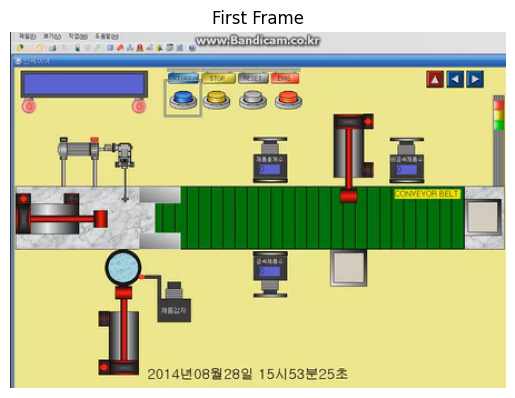

In [ ]:
# 첫 프레임 출력
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()  # 첫 번째 프레임 읽기

if ret:
    print("첫 프레임 출력 성공")

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
    plt.imshow(rgb)
    plt.title("First Frame")
    plt.axis('off')
    plt.show()

cap.release()  # 비디오 캡쳐 객체 해제


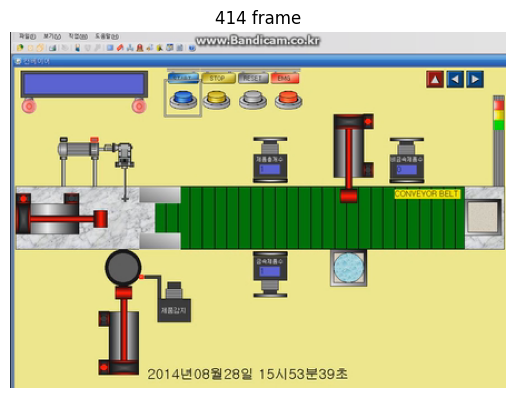

In [15]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 414
cap.set(cv2.CAP_PROP_POS_FRAMES, position)  # 특정 프레임으로 이동
ret, frame = cap.read()  # 첫 번째 프레임 읽기
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환

cv2.imwrite("C:\\Users\\user\\Pictures\\public\\frame_choice.jpg", rgb)  # 프레임 저장
plt.imshow(rgb)
plt.title(f"{position} frame")
plt.axis('off')
plt.show()


In [21]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 414
cap.set(cv2.CAP_PROP_POS_FRAMES, position)  # 특정 프레임으로 이동
ret, frame = cap.read()  # 첫 번째 프레임 읽기
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환

cv2.imwrite("C:\\Users\\user\\Pictures\\public\\frame_choice2.jpg", rgb)  # 프레임 저장
plt.imshow(rgb)
plt.title(f"{position} frame")
plt.axis('off')
plt.show()


NameError: name 'plt' is not defined

In [12]:
print("프레임 크기", frame.shape)

프레임 크기 (320, 446, 3)


In [26]:
import os
import cv2

# ROI 정의 (x, y, width, height) -> 왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이
# 51, 121
cap = cv2.VideoCapture(video_path)

roi = (51, 121, 95, 95)
x, y, w, h = roi

cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2) # 화면에다가 ROI 삽입, 초록색, 굵기 2

rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
cap.release()

plt.imshow(rgb)
plt.title(f"{position} frame")
plt.axis('off')
plt.show()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [29]:
import os
import cv2


roi_dir = "C:\\Users\\user\\Pictures\\public\\frames_ROI"

os.makedirs(roi_dir, exist_ok=True)  # 저장폴더 없으면 생성




# ROI 정의 (x, y, width, height) -> 왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이
cap = cv2.VideoCapture(video_path)
roi1 = (51, 121, 95, 95)
roi2 = (208, 90, 240, 150)
x1, y1, w1, h1 = roi1
x2, y2, w2, h2 = roi2

frame_count = 0
while True:
    ret, frame = cap.read()  # 프레임 읽기
    if not ret:  # 프레임을 읽지 못하면 종료
        break
    
    # 첫 번째 ROI
    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)  # 초록색, 굵기 2
    # 두 번째 ROI
    cv2.rectangle(frame, (x2, y2), (x2 + w2, y2 + h2), (0, 0, 255), 1)  # 파란색, 굵기 2

    roi_filename = os.path.join(roi_dir, f"frame_ROI_{frame_count:04d}.jpg")
    cv2.imwrite(roi_filename, frame)  # 프레임 저장
    frame_count += 1

cap.release()
print(f"총 {frame_count}개의 ROI 프레임이 저장되었습니다.")



# rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
# plt.imshow(rgb)
# plt.title(f"{position} frame")
# plt.axis('off')
# plt.show()

총 1337개의 ROI 프레임이 저장되었습니다.


In [ ]:
import os
import cv2


roi_dir = "C:\\Users\\user\\Pictures\\public\\frames_ROI"

roi1_dir = os.path.join(roi_dir, "ROI1")
roi2_dir = os.path.join(roi_dir, "ROI2")


os.makedirs(roi_dir, exist_ok=True)  # 저장폴더 없으면 생성
os.makedirs(roi1_dir, exist_ok=True)
os.makedirs(roi2_dir, exist_ok=True)


# ROI 정의 (x, y, width, height) -> 왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이
cap = cv2.VideoCapture(video_path)
roi1 = (51, 121, 95, 95)
roi2 = (208, 90, 240, 150)
x1, y1, w1, h1 = roi1
x2, y2, w2, h2 = roi2

frame_count = 0
while True:
    ret, frame = cap.read()  # 프레임 읽기
    if not ret:  # 프레임을 읽지 못하면 종료
        break
    
    # ROI 마킹포함 전체 프레임
    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)  # 초록색, 굵기 2
    cv2.rectangle(frame, (x2, y2), (x2 + w2, y2 + h2), (0, 0, 255), 1)  # 파란색, 굵기 2
    roi_filename = os.path.join(roi_dir, f"frame_ROI_{frame_count:04d}.jpg")
    cv2.imwrite(roi_filename, frame)  # 프레임 저장

    #ROI1만 크롬해서 저장
    roi1_crop = frame[y1:y1 + h1, x1:x1 + w1] #x와 y의 값이 뒤집어져있다. -> [y ,x] 한테
    roi_filename = os.path.join(roi1_dir, f"ROI_{frame_count:04d}.jpg")
    cv2.imwrite(roi_filename, roi1_crop)  # ROI1 프레임 저장

    #ROI2만 크롬해서 저장
    roi2_crop = frame[y2:y2 + h2, x2:x2 + w2] #x와 y의 값이 뒤집어져있다. -> [y ,x] 한테
    roi_filename = os.path.join(roi2_dir, f"ROI_{frame_count:04d}.jpg")
    cv2.imwrite(roi_filename, roi2_crop)  # ROI1 프레임 저장

    frame_count += 1

cap.release()
print(f"총 {frame_count}개의 ROI 프레임이 저장되었습니다.")



# rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
# plt.imshow(rgb)
# plt.title(f"{position} frame")
# plt.axis('off')
# plt.show()